## Installation de Docker

Installez les outils de support dont Docker aurait besoin pour exécuter :

In [ ]:
! sudo apt install apt-transport-https ca-certificates curl \gnupg-agent software-properties-common

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ca-certificates is already the newest version (20210119~18.04.2).
curl is already the newest version (7.58.0-2ubuntu3.16).
software-properties-common is already the newest version (0.96.24.32.14).
The following NEW packages will be installed:
  apt-transport-https gnupg-agent
0 upgraded, 2 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,212 B of archives.
After this operation, 197 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 apt-transport-https all 1.6.14 [4,348 B]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 gnupg-agent all 2.2.4-1ubuntu1.4 [4,864 B]
Fetched 9,212 B in 0s (32.7 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> l

Téléchargez la clé gpg Docker et ajoutez-la au gestionnaire de packages apt :

In [ ]:
! curl -fsSL https://download.docker.com/linux/ubuntu/gpg | sudo gpg --dearmor -o /usr/share/keyrings/docker-archive-keyring.gpg

Vous devez ensuite ajouter le référentiel Docker à votre configuration apt afin de pouvoir télécharger des packages à partir de là :

In [ ]:
! echo \
  "deb [arch=$(dpkg --print-architecture) signed-by=/usr/share/keyrings/docker-archive-keyring.gpg] https://download.docker.com/linux/ubuntu \
  $(lsb_release -cs) stable" | sudo tee /etc/apt/sources.list.d/docker.list > /dev/null


Maintenant, enfin, installez le moteur Docker en utilisant les commandes suivantes :

In [ ]:
! sudo apt-get update
! sudo apt-get install docker-ce docker-ce-cli containerd.io

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:3 https://download.docker.com/linux/ubuntu bionic InRelease [64.4 kB]
Ign:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:10 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:11 http://security.ubuntu.com/ubuntu bionic-security/restricted amd64 Packages [689 kB]
Get:12 http://archive.ubuntu.co

vérifiez si Docker est installé avec succès, exécutez la commande suivante :

In [ ]:
! sudo docker --version

Docker version 20.10.11, build dea9396



Maintenant, la prochaine chose que vous voudrez peut-être faire est d'autoriser les utilisateurs réguliers à utiliser Docker. Vous ne voudriez pas que vos utilisateurs agissent en tant que root pour créer et exécuter des conteneurs. Pour ce faire, exécutez la commande suivante:


    sudo usermod -a -G docker <username>

Pour appliquer les modifications à votre profil, vous devez vous déconnecter de votre machine virtuelle et vous reconnecter. 

Ainsi, maintenant que Docker est entièrement configuré sur votre machine, exécutons un conteneur hello-world pour voir par nous-mêmes :

## Exécution de votre premier conteneur

Vous créez des conteneurs Docker à partir d'images de conteneur Docker. Bien que nous discutions des images de conteneurs et de leur architecture dans les guide suivants, un excellent moyen de les visualiser est une copie de tous les fichiers, bibliothèques d'applications et dépendances qui composeraient votre environnement d'application, similaire à une image de machine virtuelle.


Pour exécuter un conteneur Docker, nous utiliserons la commande docker run, qui a la structure suivante :


    $ docker run [OPTIONS] IMAGE[:TAG|@DIGEST] [COMMAND] [ARG...]

## Exécuter des conteneurs Docker en arrière-plan

Pour exécuter un conteneur Docker en arrière-plan en tant que démon, vous pouvez utiliser docker exécuté en mode détaché à l'aide de l'indicateur -d :


    $ docker run -d nginx:1.18.0

## Dépannage des conteneurs
Pour voir ce qui se passe dans le conteneur, vous pouvez utiliser la commande docker logs. Mais avant d'utiliser cela, nous devons connaître l'ID du conteneur ou le nom du conteneur pour voir les journaux du conteneur.


    $ docker ps
    CONTAINER ID        IMAGE               COMMAND                     
    CREATED             STATUS              PORTS               
    NAMES
    beb5dfd529c9        nginx:1.18.0        "/docker-
    entrypoint.…"   2 minutes ago       Up 2 minutes        80/tcp              
    fervent_shockley


Nous voyons qu'il répertorie le conteneur NGINX que nous venons de démarrer. À moins que vous ne spécifiiez un nom particulier à votre conteneur, Docker lui attribue un nom aléatoire. 

Dans ce cas, il l'a appelé fervent_shockley. Il attribue également à chaque conteneur un ID de conteneur unique, tel que beb5dfd529c9. Vous pouvez utiliser l'ID du conteneur ou le nom du conteneur pour interagir avec le conteneur afin de répertorier les journaux. Utilisons l'ID du conteneur cette fois :

    $ docker logs beb5dfd529c9
    /docker-entrypoint.sh: /docker-entrypoint.d/ is not empty, will attempt to perform configuration
    ...
    /docker-entrypoint.sh: Configuration complete; ready for start up


Comme vous pouvez le voir, il imprime une sortie de journal similaire à celle utilisée lorsque nous l'avons exécuté au premier plan. 

En pratique, vous utiliseriez les journaux docker 90% du temps, à moins que vous n'ayez besoin de déboguer quelque chose avec BusyBox. BusyBox est un conteneur shell léger qui peut vous aider à résoudre et à déboguer les problèmes avec votre conteneur - principalement des problèmes de réseau. Faisons maintenant écho à BusyBox Hello World ! pour nous:


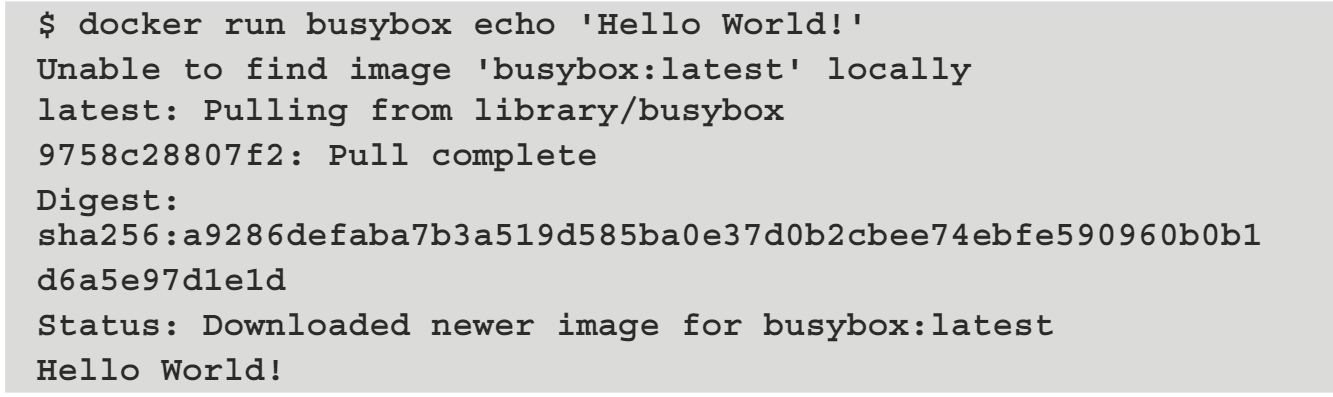

Comme nous le voyons, Docker extrait la dernière image busybox de Docker Hub et exécute la commande echo 'Hello World'. Vous pouvez également utiliser BusyBox en mode interactif en utilisant le drapeau -it, qui vous aidera à exécuter une série de commandes sur le Shell BusyBox. 

C'est aussi une bonne idée d'y ajouter un indicateur --rm pour dire à Docker de nettoyer les conteneurs une fois que nous sommes sortis du shell, quelque chose comme ceci :

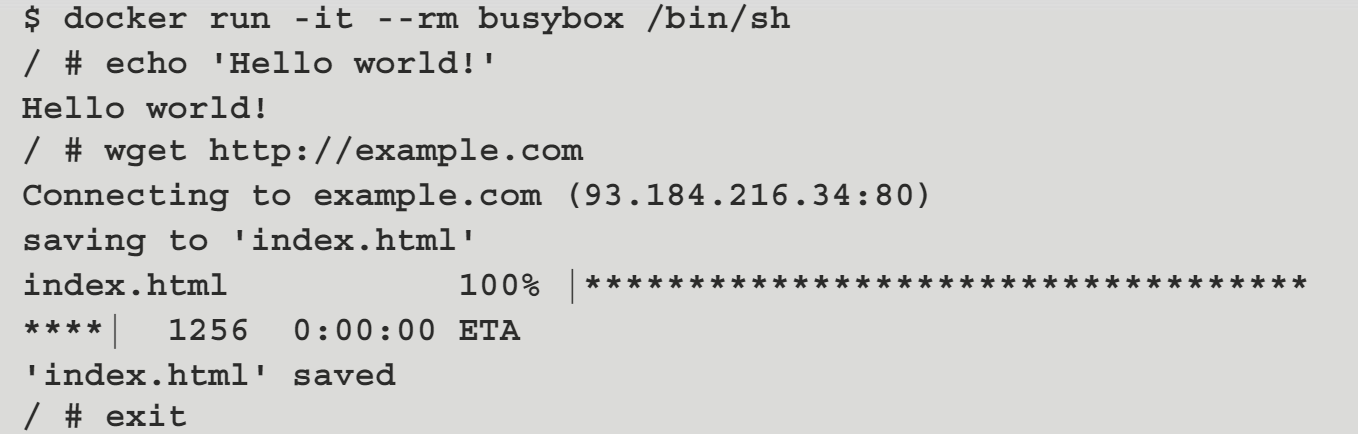

Lorsque nous répertorions tous les conteneurs, nous n'y voyons pas le conteneur BusyBox :


    $ docker ps -a

Il existe divers autres drapeaux que vous pouvez utiliser avec vos conteneurs, chacun ayant un objectif spécifique. Regardons quelques-uns communs

## En résumé, 

le meilleur paramètre pour un conteneur NGINX hautement disponible devrait être le suivant :


    $ docker run -d --name nginx --restart unless-stopped \
    -p 80:80 --memory 1000M --memory-reservation 250M nginx:1.18.0



Ce qui suit s'applique :

*  -d : exécute en tant que démon en mode détaché.
*  --name nginx : donnez le nom nginx.

* --restart unless-stopped : redémarre toujours automatiquement en cas d'échec à moins qu'il ne soit explicitement arrêté manuellement, et démarre également automatiquement au démarrage du démon Docker. Les autres options incluent no, on_failure et always.
*  -p 80:80 : transfert le trafic du port hôte 80 vers le port 80 du conteneur. Cela vous permet d'exposer votre conteneur à votre réseau hôte.

*  --memory 1000M : limite la consommation de mémoire du conteneur à 1000M. Si la mémoire dépasse cette limite, le conteneur s'arrêtera et agira selon l'indicateur --restart.
*  --memory-reservation 250M : Allouez une limite de 250M de mémoire au conteneur si le serveur manque de mémoire.


Il existe d'autres indicateurs que nous examinerons dans les sections suivantes au fur et à mesure que nous nous familiariserons davantage.

## Redémarrer et supprimer des conteneurs 

Pour redémarrer vos conteneurs, vous devez d'abord arrêter votre conteneur, puis le démarrer. Pour arrêter votre conteneur, exécutez la commande suivante :


    $ docker stop nginx

Pour démarrer votre conteneur, exécutez la commande suivante :


    $ docker start nginx

Si vous souhaitez vous débarrasser complètement de votre conteneur, vous devez d'abord arrêter votre conteneur puis le supprimer, à l'aide de la commande suivante :


    $ docker stop nginx && docker rm nginx
  

Alternativement, vous pouvez également utiliser la commande suivante pour le faire en une seule fois :


    $ docker rm -f nginx


Voyons maintenant comment surveiller nos conteneurs avec des outils tels que journald et Splunk dans la section suivante.

## Journalisation Docker et pilotes de journalisation

Docker a non seulement modifié la façon dont les applications sont déployées, mais également le flux de travail pour la gestion des journaux. Au lieu d'écrire des journaux dans des fichiers, les conteneurs écrivent des journaux dans la console (stdout/stderr). Docker utilise ensuite un pilote de journalisation pour exporter les journaux de conteneur vers les destinations choisies

## Gestion des journaux de conteneurs
La gestion des journaux est une fonction essentielle de Docker, comme toute application. Mais, en raison de la nature transitoire des charges de travail Docker, cela devient plus critique à mesure que nous perdons le système de fichiers et potentiellement les journaux également lorsque le conteneur est supprimé ou fait face à un problème. Nous devons donc utiliser des pilotes de journal pour exporter les journaux dans un endroit particulier, les stocker et les conserver. Si vous disposez d'une solution d'analyse de logs, le meilleur endroit pour vos logs est à l'intérieur. Docker prend en charge plusieurs cibles de journal via des pilotes de journalisation. Regardons.

## Pilotes de journalisation

Au moment de la rédaction de ce guide, les pilotes de journalisation suivants sont disponibles :

* none : none journal n'est disponible pour le conteneur et, par conséquent, ils ne sont stockés nulle part.
* local : les logs sont stockés localement dans un format personnalisé et minimise donc les frais généraux.
* json-file : les fichiers journaux sont stockés au format JSON, et il s'agit du pilote de journalisation Docker par défaut.
* syslog : utilise également syslog pour stocker les journaux Docker. Cette option est logique lorsque vous utilisez syslog comme mécanisme de journalisation par défaut.

* journald : utilise journald pour stocker les journaux Docker. Vous pouvez utiliser la ligne de commande journald pour parcourir les journaux du conteneur et les journaux du démon Docker.
* gelf : envoie les journaux à un point de terminaison Graylog Extended Log Format (GELF) tel que Graylog ou Logstash.
* fluentd : envoie les journaux à Fluentd.
* awslogs : Envoie des journaux à AWS CloudWatch.
* splunk : envoie des journaux à Splunk à l'aide du collecteur d'événements HTTP.
* etwlogs : envoie des journaux aux événements de suivi d'événements pour Windows (ETW). Vous ne pouvez l'utiliser que sur les plates-formes Windows.
*  gcplogs : envoie les journaux à Google Cloud Logging.
* logentries : envoie les journaux à Rapid7 Logentries.


Bien que toutes ces options soient viables, nous examinerons journald et Splunk. Alors que journald est une option de surveillance des services du système d'exploitation natif, Splunk est l'un des outils d'analyse et de surveillance des journaux les plus célèbres disponibles sur le marché. Voyons maintenant comment congurer un pilote de journalisation.

## Configurer les pilotes de journalisation

Commençons par trouver le pilote de journalisation actuel :


    $ docker info | grep "Logging Driver" 
    Logging Driver: json-file

Bon, donc actuellement, le pilote de journalisation par défaut est défini sur json-file. Si nous voulons utiliser journald ou Splunk comme pilote de journalisation par défaut, nous devons configurer le pilote de journalisation par défaut dans le fichier daemon.json.


Modifiez le fichier /etc/docker/daemon.json à l'aide d'un éditeur de votre choix. Si vous utilisez vim, exécutez la commande suivante


    $ vim /etc/docker/daemon.json


Ajoutez l'entrée log-driver au fichier de configuration daemon.json :


    {  
      "log-driver": "journald"
    }


Ensuite, redémarrez le service Docker :


    $ sudo systemctl restart docker

Vérifiez l'état du service Docker :


    $ sudo systemctl status docker

Maintenant, réexécutez les informations sur docker pour voir ce que nous obtenons :


    $ docker info | grep "Logging Driver" 
    Logging Driver: journald


Bon, comme journald est maintenant le pilote de journalisation par défaut, lançons un nouveau conteneur NGINX et visualisons les journaux :


    $ docker run --name nginx-journald -d nginx



Regardons maintenant les journaux journald pour voir ce que nous obtenons :


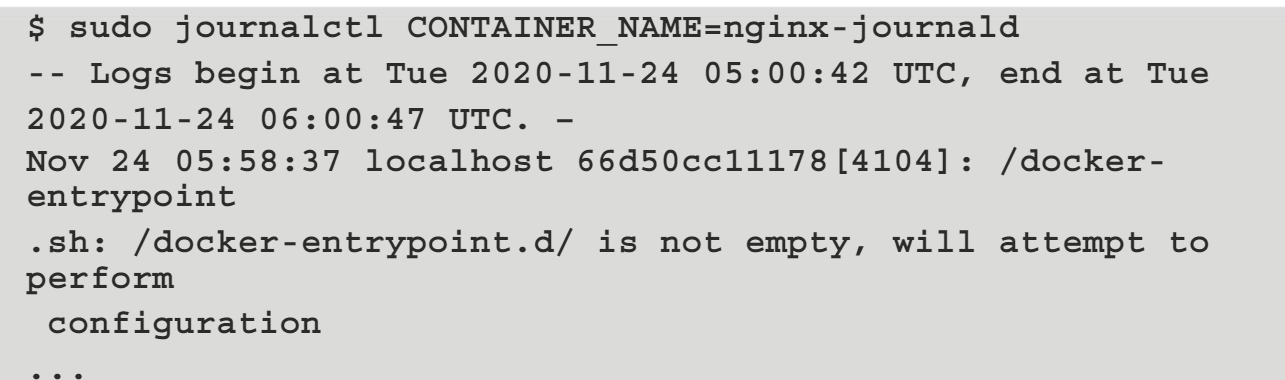

Et nous voyons les journaux dans le journal. 

Nous pouvons également configurer le pilote de journalisation Splunk pour envoyer des données à Splunk à des fins d'analyse et de visualisation. 

Voyons maintenant.

Modifiez le chier /etc/docker/daemon.json à l'aide d'un éditeur de votre choix. Si vous utilisez vim, exécutez la commande suivante :


    $ vim /etc/docker/daemon.json
  

Ajoutez l'entrée log-driver au fichier de configuration daemon.json :



    {  
      "log-driver": "splunk",  
      "log-opts": {    
        "splunk-token": "<Splunk HTTP Event Collector token>",    
        "splunk-url": "<Splunk HTTP(S) url>"  
        }
      }

Ensuite, redémarrez le service Docker :

    $ sudo systemctl restart docker

Vérifiez l'état du service Docker :


    $ sudo systemctl status docker

Maintenant, réexécutez les informations sur docker pour voir ce que nous obtenons :


      $ docker info | grep "Logging Driver" 
      Logging Driver: splunk


Bon, comme Splunk est maintenant le pilote de journalisation par défaut, lançons un nouveau conteneur NGINX et visualisons les journaux


    $ docker run --name nginx-splunk -d nginx

Maintenant, connectez-vous à votre instance Splunk et vous verrez les journaux Docker en streaming. Vous pouvez ensuite analyser les journaux et créer des visualisations à partir d'eux. 

Vous pouvez également avoir différents pilotes de journalisation pour différents conteneurs, et vous pouvez faites-le en remplaçant les valeurs par défaut en passant les indicateurs log-driver et log-opts à partir de la ligne de commande. 

Comme notre configuration actuelle est Splunk et que nous souhaitons exporter des données vers un fichier JSON, nous pouvons spécifier le pilote de journal en tant que fichier json lors de l'exécution du conteneur. Regardons:


    $ docker run --name nginx-json-file --log-driver json-file -d nginx


Bon, donc pour visualiser les journaux JSON, nous devons regarder dans le répertoire des journaux JSON, c'est-à-dire /var/lib/docker/containers/<container_id>/<container_id>-json.log.

Pour le conteneur nginx-json-file , nous pouvons effectuer les opérations suivantes :


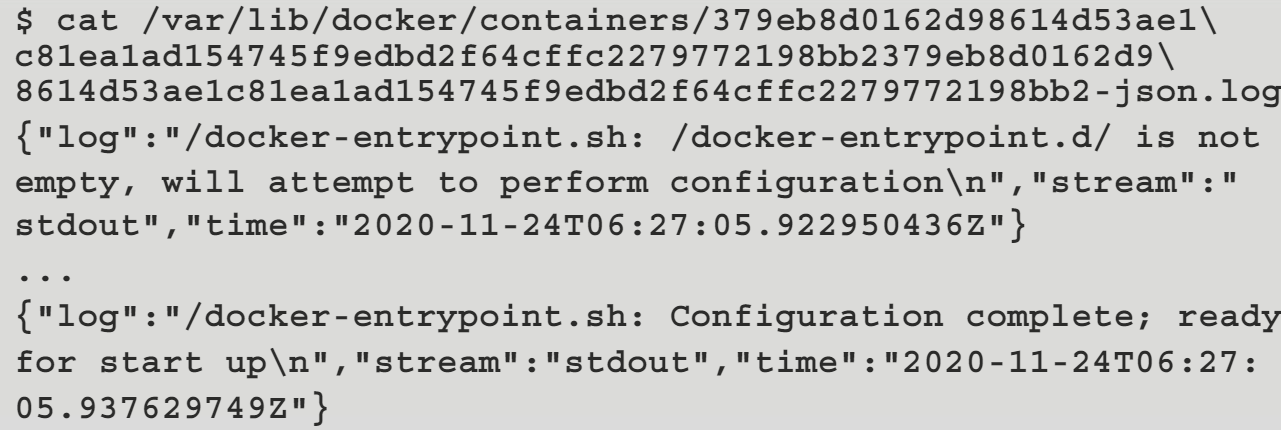



## Gestion déclarative des conteneurs avec Docker Compose

Docker Compose vous aide à gérer plusieurs conteneurs de manière déclarative. Vous créez un fichier YAML et spécifiez ce que vous souhaitez créer, quels conteneurs vous souhaitez exécuter et comment les conteneurs interagissent les uns avec les autres. 

Vous pouvez définir des montages, des réseaux, des mappages de ports et de nombreuses configurations différentes dans le fichier YAML. gagne rapidement du terrain en raison de la puissance et de la simplicité qu'il ofre. 

Désormais, les administrateurs système n'ont plus besoin de se souvenir des commandes qu'ils ont exécutées ou d'écrire de longs scripts ou playbooks pour gérer les conteneurs. Au lieu de cela, ils peuvent simplement déclarer ce qu'ils veulent dans un fichier YAML, et docker-compose ou d'autres outils peuvent les aider à atteindre cet état

## Déploiement d'un exemple d'application avec Docker Compose

Nous avons une application Python Flask qui écoute sur le port 5000, que nous allons éventuellement mapper sur le port hôte 80. 

L'application se connectera à la base de données Redis exécutée en tant que service backend sur son port par défaut 6379 et récupérera l'heure de la dernière visite de la page. 

Nous n'exposerons pas ce port au système hôte. Cela signifie que la base de données est entièrement interdite à toute partie externe ayant accès à l'application. Les fichiers sont disponibles dans le référentiel GitHub  de ce quide:




    import time

    import redis
    from flask import Flask
    from datetime import datetime


    app = Flask(__name__)
    cache = redis.Redis(host='redis', port=6379)

    def get_last_visited():
        try:
            last_visited = cache.getset('last_visited',str(datetime.now().strftime("%Y-%m-%d, %H:%M:%S")))
            if last_visited is None:
                return cache.getset('last_visited',str(datetime.now().strftime("%Y-%m-%d, %H:%M:%S")))
            return last_visited
        except redis.exceptions.ConnectionError as e:
            raise e

    @app.route('/')
    def index():
        last_visited = str(get_last_visited().decode('utf-8'))
        return 'Hi there! This page was last visited on {}.\n'.format(last_visited)


Le fichier requirements.txt est le suivant :

    flask
    redis

Nous verrons comment créer une image Docker en détail dans le guide suivant. Pour l'instant, regardons le fichier docker-compose dans la section suivante



## Création du chier docker-compose 

La prochaine étape du processus consiste à créer un fichier docker-compose. Un fichier docker-compose est un fichier YAML qui contient une liste de services, réseaux, volumes et autres configurations associées. Regardons l'exemple de fichier docker-compose.yaml suivant pour mieux le comprendre :



    version: "2.4"
    services:
      flask:
        image: "bharamicrosystems/python-flask-redis:latest"
        ports:
          - "80:5000"
        networks:
          - flask-app-net
      redis:
        image: "redis:alpine"
        networks:
          - flask-app-net
        command: ["redis-server", "--appendonly", "yes"]
        volumes:
          - redis-data:/data

    networks:
      flask-app-net:
        driver: bridge

    volumes:
      redis-data:


Le fichier YAML décrit deux services - Flask et Redis. 

Le service Flask utilise l'image python-flask-redis:latest - l'image que nous avons construite avec le code précédent. Il mappe également le port hôte 80 au port de conteneur 5000, 

ce qui exposera cette application à votre machine hôte sur le port 80, et vous pourrez y accéder via http://localhost.


Le service Redis utilise l'image ofcielle redis:alpine et n'expose aucun port, car nous ne voulons pas de ce service en dehors des limites du réseau de conteneurs. Cependant, il déclare un volume persistant, redis-data, qui comprend le répertoire /data. Nous monterions ce volume sur le système de fichiers hôte pour une persistance au-delà du cycle de vie du conteneur.


Il existe également un réseau flask-app-net qui utilise le pilote de pont, et les deux services partagent le même réseau. 

Cela signifie que les services peuvent s'appeler en utilisant leur nom de service. Si vous regardez le code app.py, vous constaterez que nous établissons une connexion au service Redis à l'aide du nom d'hôte redis. Pour appliquer la configuration, exécutez simplement docker-compose up -d


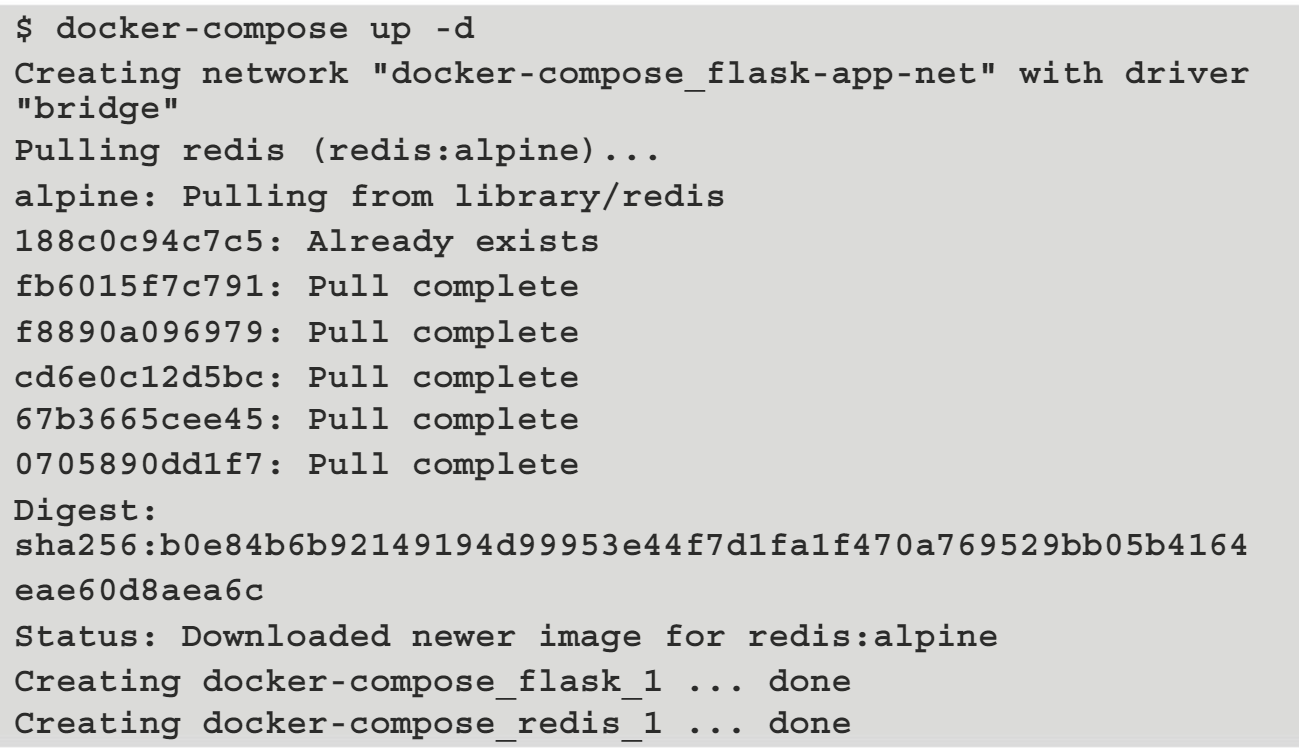

Bon, listons les conteneurs Docker pour voir comment nous nous en sortons :


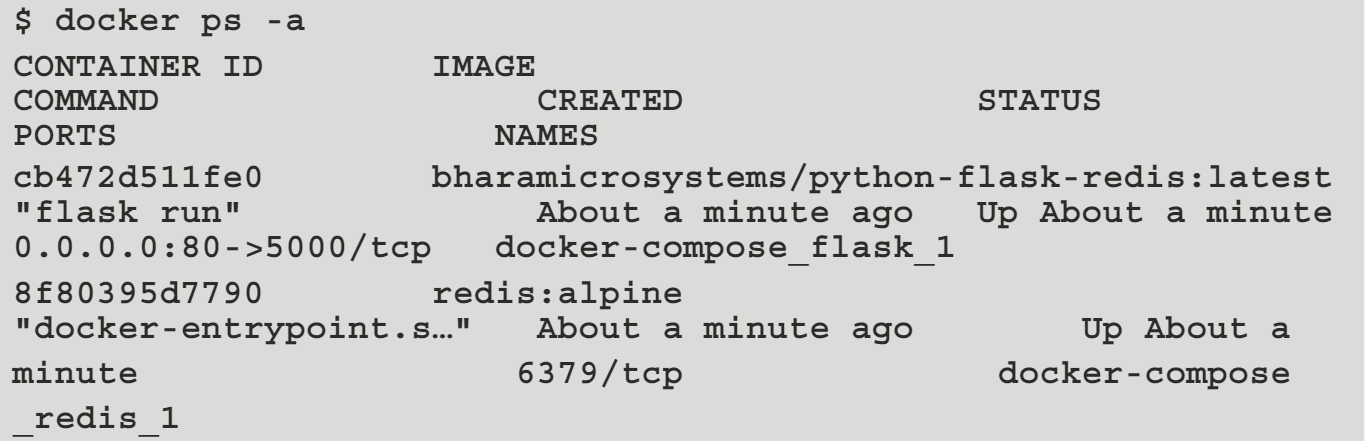



Nous voyons deux conteneurs en cours d'exécution pour les deux services. Nous voyons également le port hôte 80 transférer les connexions vers le port de conteneur 5000 sur le service Flask. Le service Redis est interne et, par conséquent, il n'y a pas de mappage de port


Let's curl localhost et voyons ce que nous obtenons :


    $ curl localhost
    Hi there! This page was last visited on 2020-11-25, 06:35:24.